# Problem Statement:
 - Stock markets are critical to the global economy. Accurate predictions of stock prices can provide valuable insights to investors, traders, and financial institutions. However, stock prices are influenced by a multitude of factors, including market sentiment, economic indicators, and company performance, making accurate predictions a challenging task

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Activation, Dropout, Dense
import pandas_datareader as pdr
import yfinance as yf


In [2]:
start_date = "2010-01-01"
end_date = "2019-12-31"
dfdata = yf.download("AAPL", start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
dfdata

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498749,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425994,447610800
...,...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261612,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327446,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702919,93121200


In [4]:
dfdata= dfdata.reset_index()

In [5]:
dfdata.drop(columns= ["Date", "Adj Close"], axis = 1)

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


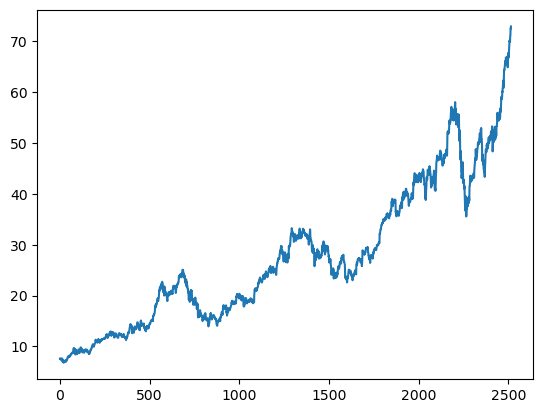

In [6]:
plt.plot(dfdata.Close)

In [7]:
ma100 = dfdata.Close.rolling(100).mean()

In [8]:
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

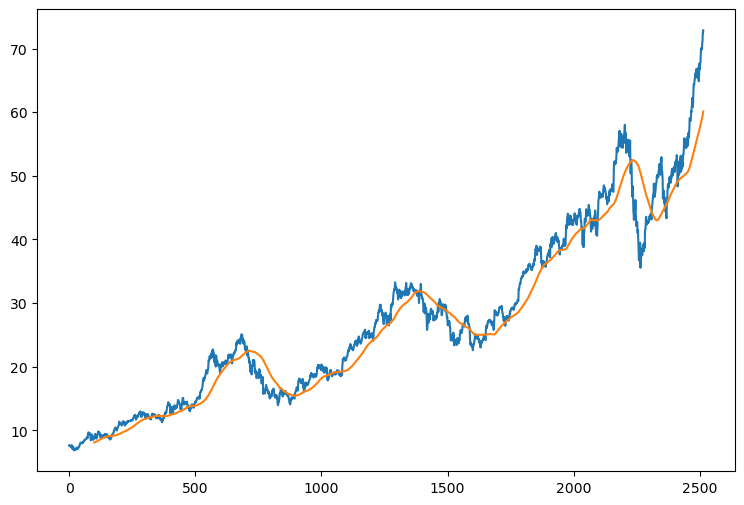

In [9]:
plt.figure(figsize = (9,6))
plt.plot(dfdata.Close)
plt.plot(ma100)
plt.show()

In [10]:
ma200 = dfdata.Close.rolling(200).mean()

In [11]:
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

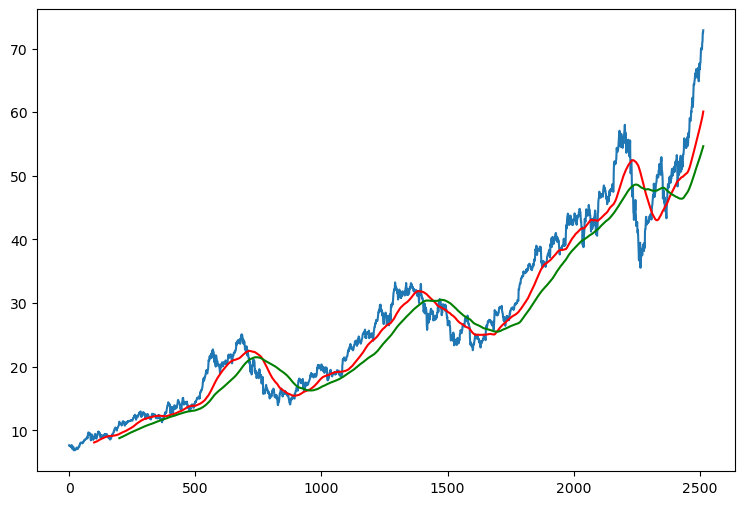

In [12]:
plt.figure(figsize = (9,6))
plt.plot(dfdata.Close)
plt.plot(ma100, "r")
plt.plot(ma200, "g")
plt.show()

In [13]:
dfdata.shape

(2515, 7)

In [14]:
dfdata.size

17605

In [15]:
dfdata.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [16]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2515 non-null   datetime64[ns]
 1   Open       2515 non-null   float64       
 2   High       2515 non-null   float64       
 3   Low        2515 non-null   float64       
 4   Close      2515 non-null   float64       
 5   Adj Close  2515 non-null   float64       
 6   Volume     2515 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.7 KB


In [17]:
# SPLITING DATA INTO TRAINING AND TESTING

In [18]:
data_training = pd.DataFrame(dfdata["Close"][0:int(len(dfdata)*0.70)])
data_testing = pd.DataFrame(dfdata["Close"][int(len(dfdata)*0.70): int(len(dfdata))])

In [19]:
data_training

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [20]:
data_testing 

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
...,...
2510,71.000000
2511,71.067497
2512,72.477501
2513,72.449997


In [21]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dropout, Dense

In [22]:
scaler = MinMaxScaler(feature_range = (0,1))

In [23]:
data_training_sc = scaler.fit_transform(data_training)

In [24]:
data_training_sc

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [26]:
x_train = []
y_train = []

for i in range(100, data_training_sc.shape[0]):
    x_train.append(data_training_sc[i-100: i])
    y_train.append(data_training_sc[i, 0])
    

In [27]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
model = Sequential()

In [29]:
model.add(LSTM(units= 50, activation= "relu", return_sequences= True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

In [30]:
model.add(LSTM(units= 60, activation= "relu", return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units= 80, activation= "relu", return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units= 120, activation= "relu"))
model.add(Dropout(0.5))
          
model.add(Dense(units = 1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [32]:
model.compile(optimizer = "adam", loss= "mean_squared_error")
model.fit(x_train, y_tra
          in, epochs= 50)

Epoch 1/50
52/52 [==============================] - 47s 635ms/step - loss: 0.0681
Epoch 2/50
52/52 [==============================] - 30s 585ms/step - loss: 0.0133
Epoch 3/50
52/52 [==============================] - 33s 630ms/step - loss: 0.0106
Epoch 4/50
52/52 [==============================] - 33s 633ms/step - loss: 0.0101
Epoch 5/50
52/52 [==============================] - 33s 632ms/step - loss: 0.0104
Epoch 6/50
52/52 [==============================] - 33s 627ms/step - loss: 0.0106
Epoch 7/50
52/52 [==============================] - 33s 632ms/step - loss: 0.0084
Epoch 8/50
52/52 [==============================] - 32s 621ms/step - loss: 0.0092
Epoch 9/50
52/52 [==============================] - 33s 634ms/step - loss: 0.0082
Epoch 10/50
52/52 [==============================] - 33s 630ms/step - loss: 0.0076
Epoch 11/50
52/52 [==============================] - 33s 627ms/step - loss: 0.0071
Epoch 12/50
52/52 [==============================] - 33s 625ms/step - loss: 0.0084
Epoch 13/50
5

In [33]:
model.save("keras_model.h5")

In [34]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [35]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [36]:
past_100_days = data_training.tail(100)

In [37]:
final_data = past_100_days.append(data_testing, ignore_index = True) 

In [38]:
final_data.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [39]:
input_data = scaler.fit_transform(final_data)

In [40]:
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [41]:
input_data.shape

(855, 1)

In [42]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [43]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [44]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [45]:
## MAKING PREDICTIONS 
y_predict = model.predict(x_test)

24/24 [==============================] - 7s 182ms/step


In [46]:
y_predict.shape

(755, 1)

In [47]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [48]:
y_predict

array([[0.10529105],
       [0.10575047],
       [0.10621616],
       [0.10667577],
       [0.10711853],
       [0.10753469],
       [0.10791832],
       [0.10826986],
       [0.10859513],
       [0.10890178],
       [0.10919926],
       [0.10949354],
       [0.1097887 ],
       [0.11009014],
       [0.11040123],
       [0.11072271],
       [0.11105435],
       [0.11139446],
       [0.11174226],
       [0.11210445],
       [0.11248672],
       [0.11289221],
       [0.11331917],
       [0.11377648],
       [0.11430804],
       [0.11495677],
       [0.11576433],
       [0.11677054],
       [0.11800966],
       [0.11950506],
       [0.12124993],
       [0.12322865],
       [0.12543106],
       [0.12784928],
       [0.13046864],
       [0.13326806],
       [0.13622692],
       [0.13932502],
       [0.14253482],
       [0.1458222 ],
       [0.14915133],
       [0.15248588],
       [0.15581226],
       [0.15912253],
       [0.16240889],
       [0.16565785],
       [0.16885222],
       [0.171

In [49]:
scaler.scale_

array([0.02123255])

In [50]:
scale_factor = 1/0.02123255
y_predict = y_predict * scale_factor
y_test = y_test * scale_factor

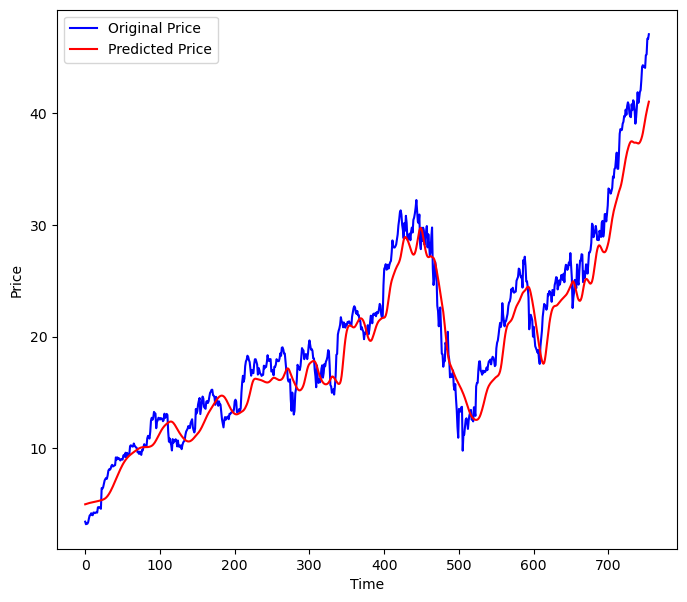

In [51]:
plt.figure(figsize= (8,7))
plt.plot(y_test, "b", label= "Original Price")
plt.plot(y_predict, "r", label= "Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()